# Final Project - Exploratory Analysis

Individuals that are considered expats in certain countries often have high amounts of exposure to the ambient second language in whichever country they reside. As second language learners, this can contribute to a competition between their native languages and second languages for all of the sounds in the phonetic space between the two languages. In Lang & Davidson (in review), one group of long-term American residents in Paris were examined for this type of competition, defined as "phonetic drift," in which their native language sounds begin to shift towards the sounds of the ambient second language, French.

Hypothesis: Do Paris Residents in the Lang & Davidson (in review) belong to their own category of speakers of English or are their vowel utterances in English closer to those of a monolingual English speaker or a even monolingual French speaker? 

In [241]:
%matplotlib inline
#import necessary modules and tell matplotlib to print inline
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as pl
from sklearn.linear_model import LogisticRegression

# Cleaning and Examining Data

In [206]:
df = pd.read_excel('/Users/bcl/my_hw_repo/benfinal_GAedit.xls') #importing excel of all raw data
data = df #changing data name so we don't modify original data
#following line deletes unnecessary data for current exploration
data = data.drop(['Comment','hiV','Coronal','FileNum','Midpoint','Duration','Outliers','Comment_Num','GrLangAge','SubGroup','F3','F3nearey'],1)
data #show the data

,Subject,Group,Language,Word,PhonemeOrig,Phoneme,F1,F2,F1nearey,F2nearey
0,AL,C,English,bets,eh,3h,508.9,1740.6,1.155,1.118
1,AL,C,English,debts,eh,3h,552.7,1810.8,1.254,1.163
2,AL,C,English,jets,eh,3h,495.7,1656.9,1.125,1.064
3,AL,C,English,peck,eh,3h,538.1,1685.1,1.221,1.082
4,AL,C,English,said,eh,3h,465.5,1677.5,1.056,1.077
5,AL,C,English,shed,eh,3h,498.6,1657.3,1.132,1.064
6,AM,C,English,bets,eh,3h,568.1,1967.1,1.201,1.150
7,AM,C,English,debts,eh,3h,574.5,1965.0,1.215,1.149
8,AM,C,English,jets,eh,3h,510.5,1944.4,1.079,1.137
9,AM,C,English,peck,eh,3h,650.2,1775.4,1.375,1.038


In [207]:
data.info() #examine data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4136 entries, 0 to 4135
Data columns (total 10 columns):
Subject         4136 non-null object
Group           4136 non-null object
Language        4136 non-null object
Word            4136 non-null object
PhonemeOrig     4136 non-null object
Phoneme         4136 non-null object
F1              4136 non-null float64
F2              4136 non-null float64
F1nearey        4136 non-null float64
F2nearey        4136 non-null float64
dtypes: float64(4), object(6)
memory usage: 323.2+ KB


In [208]:
data.index #check index

RangeIndex(start=0, stop=4136, step=1)

In [209]:
data.columns #check columns

Index([u'Subject', u'Group', u'Language', u'Word', u'PhonemeOrig ', u'Phoneme',
       u'F1', u'F2', u'F1nearey', u'F2nearey'],
      dtype='object')

In [210]:
data['Phoneme']

0       3h
1       3h
2       3h
3       3h
4       3h
5       3h
6       3h
7       3h
8       3h
9       3h
10      3h
11      3h
12      3h
13      3h
14      3h
15      3h
16      3h
17      3h
18      3h
19      3h
20      3h
21      3h
22      3h
23      3h
24      3h
25      3h
26      3h
27      3h
28      3h
29      3h
        ..
4106     y
4107     y
4108     y
4109     y
4110     y
4111     y
4112     y
4113     y
4114     y
4115     y
4116     y
4117     y
4118     y
4119     y
4120     y
4121     y
4122     y
4123     y
4124     y
4125     y
4126     y
4127     y
4128     y
4129     y
4130     y
4131     y
4132     y
4133     y
4134     y
4135     y
Name: Phoneme, dtype: object

In [211]:
data.set_index(['Subject']) #reset index to subject initials so data is maintained within subjects

,Group,Language,Word,PhonemeOrig,Phoneme,F1,F2,F1nearey,F2nearey
Subject,,,,,,,,,
AL,C,English,bets,eh,3h,508.9,1740.6,1.155,1.118
AL,C,English,debts,eh,3h,552.7,1810.8,1.254,1.163
AL,C,English,jets,eh,3h,495.7,1656.9,1.125,1.064
AL,C,English,peck,eh,3h,538.1,1685.1,1.221,1.082
AL,C,English,said,eh,3h,465.5,1677.5,1.056,1.077
AL,C,English,shed,eh,3h,498.6,1657.3,1.132,1.064
AM,C,English,bets,eh,3h,568.1,1967.1,1.201,1.150
AM,C,English,debts,eh,3h,574.5,1965.0,1.215,1.149
AM,C,English,jets,eh,3h,510.5,1944.4,1.079,1.137


In [212]:
# How many of each individual vowel in each group?
# Make example of the English values and French values (average?)

# Make dummy variables of expat or not
# use dummy variables to train model on 7 participants
# run 5 participants through model
# break model by putting through a non-expat

In [213]:
word_freq = data['Word'].value_counts() #obtain number of times each word appears or was uttered in both languages
word_freq

chat             43
ta               41
tes              41
pipe             41
poste            41
peu              41
peau             41
petiteœuvre      41
pousses          41
deux             41
du               40
fou              40
peuventdanser    40
taux             40
tete             40
des              40
dites            40
osdedinde        40
osducorps        40
poche            40
vie              40
sot              40
sache            40
pote             40
chef             40
chez             40
jettent          40
bout             40
jeux             40
douce            40
                 ..
putts            33
teacups          33
food             33
hoe              33
dots             33
bets             33
spots            32
coop             32
two              32
zits             32
see              32
butts            32
sad              32
pots             32
pits             32
jets             32
shoes            32
shed             32
joes             32


i     437
eh    435
u     431
o     401
e     243
a     243
œ     241
oh    241
ø     236
y     235
uh    200
æ     199
oo    199
ih    198
ah    197
Name: PhonemeOrig , dtype: int64


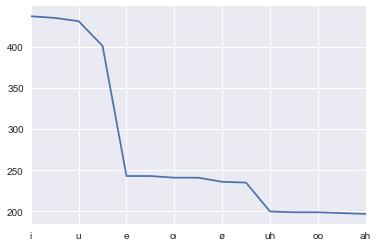

In [214]:
vowel_counts = data.iloc[:,4] 
vowel_counts_plt = vowel_counts.value_counts() #obtaining number of times each vowel eas uttered across both languages
print vowel_counts_plt
vowel_counts_plt.plot() #plotting vowel distribution, showing skew towards high vowels /i/ and /u/ in data (consistent with the original experimental question)

# Comparing Cleaned Data

In [215]:
# Indexing the French vowels only to establish average baseline of values and examine distributions
french_vowels = data[(data['Language']=='French') & (data['Group']=='D')]
french_vowels

,Subject,Group,Language,Word,PhonemeOrig,Phoneme,F1,F2,F1nearey,F2nearey
196,AH,D,French,chat,a,a,637.4,1809.0,1.429,1.049
197,AH,D,French,chat,a,a,639.8,1715.5,1.434,0.995
198,AH,D,French,pas,a,a,705.6,1966.7,1.582,1.141
199,AH,D,French,passe,a,a,615.8,1694.0,1.381,0.983
200,AH,D,French,sa,a,a,605.6,1878.4,1.358,1.090
201,AH,D,French,sache,a,a,650.9,1800.1,1.459,1.044
202,AH,D,French,ta,a,a,589.3,1615.4,1.321,0.937
258,CM,D,French,chat,a,a,631.7,1652.7,1.252,0.903
259,CM,D,French,pas,a,a,718.5,1959.4,1.424,1.070
260,CM,D,French,passe,a,a,736.7,1854.1,1.460,1.013


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12039e610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122018950>]], dtype=object)

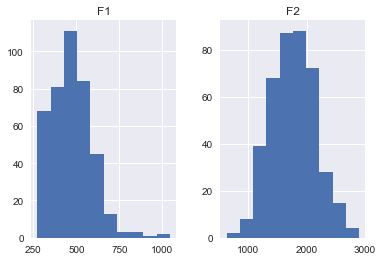

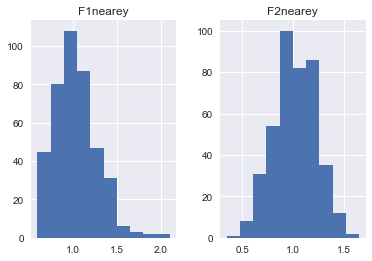

In [216]:
french_vowels.hist(['F1','F2']) #histograms showing formant distributions, raw and normalized
french_vowels.hist(['F1nearey','F2nearey'])

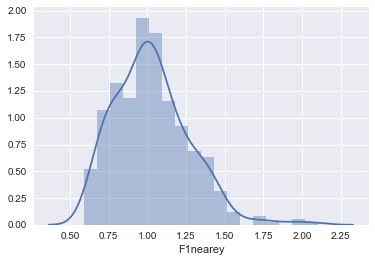

In [217]:
sns.distplot(french_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution

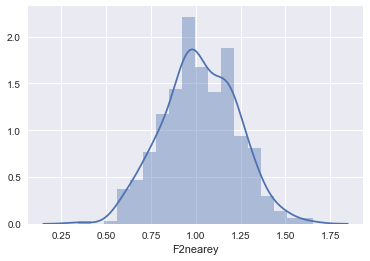

In [218]:
sns.distplot(french_vowels['F2nearey']) #new plot showing more detail of F2 normalized distribution

In [219]:
# Indexing the English vowels only to establish average baseline of values and examine distributions (Only Group A is used because it's identical to Group B,
# Groups A and B are the same group of monolinguals in English and thus represent the baseline)
english_vowels = data[(data['Language']=='English') & (data['Group']=='A')]
english_vowels

,Subject,Group,Language,Word,PhonemeOrig,Phoneme,F1,F2,F1nearey,F2nearey
18,BP,A,English,bets,eh,3h,656.5,1844.5,1.244,1.128
20,BP,A,English,debts,eh,3h,615.7,1895.0,1.167,1.159
22,BP,A,English,jets,eh,3h,618.9,1801.1,1.173,1.101
24,BP,A,English,peck,eh,3h,747.0,1692.5,1.415,1.035
26,BP,A,English,said,eh,3h,648.2,1735.8,1.228,1.061
28,BP,A,English,shed,eh,3h,670.7,1763.6,1.271,1.078
52,EL,A,English,bets,eh,3h,603.4,1553.0,1.420,1.037
54,EL,A,English,debts,eh,3h,582.2,1533.9,1.370,1.024
56,EL,A,English,jets,eh,3h,579.0,1493.7,1.362,0.997
58,EL,A,English,peck,eh,3h,613.6,1507.4,1.444,1.006


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126b9dc10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126d27a50>]], dtype=object)

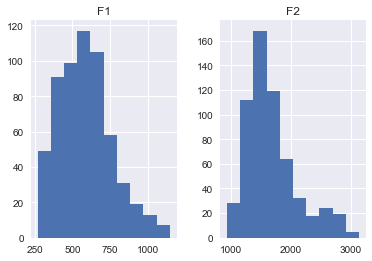

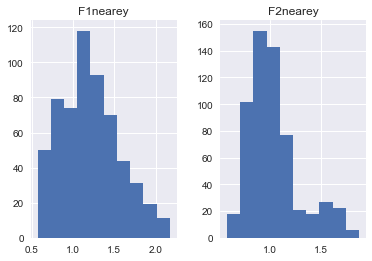

In [220]:
english_vowels.hist(['F1','F2']) #histograms showing formant distributions, raw and normalized
english_vowels.hist(['F1nearey','F2nearey'])

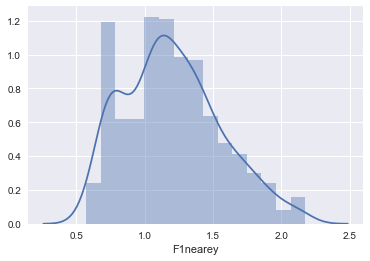

In [221]:
sns.distplot(english_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution

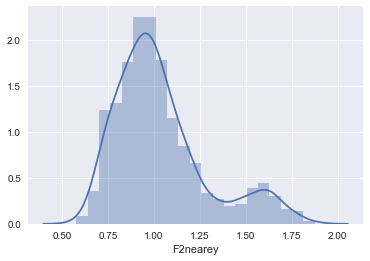

In [222]:
sns.distplot(english_vowels['F2nearey']) #new plot showing more detail of F2 normalized distribution

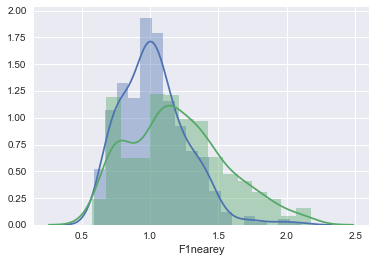

In [223]:
# Normalized French F1 compared to English F1
sns.distplot(french_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution

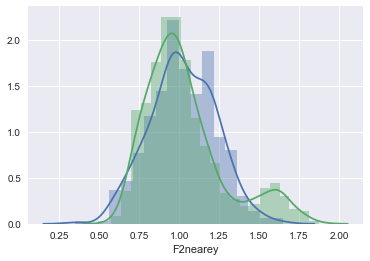

In [224]:
# Normalized French F2 compared to English F2
sns.distplot(french_vowels['F2nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels['F2nearey']) #new plot showing more detail of F1 normalized distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127b3eed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127bc1f90>]], dtype=object)

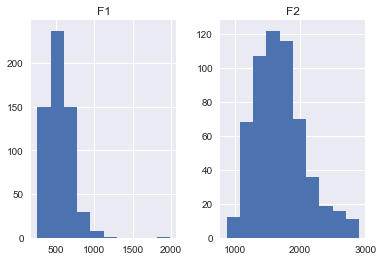

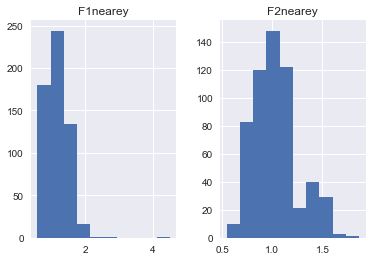

In [225]:
# What does Group C look like? How are the Paris Residents different? (Only concerned with English at this point because we want to know if their English looks more like English or French).
english_vowels_C = data[(data['Language']=='English') & (data['Group']=='C')]
english_vowels_C.hist(['F1','F2']) #histograms showing formant distributions, raw and normalized
english_vowels_C.hist(['F1nearey','F2nearey'])

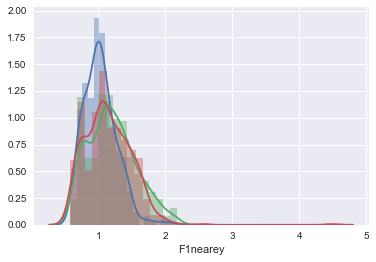

In [226]:
# Normalized French F1 compared to English F1 for Monolinguals AND Paris Residents
sns.distplot(french_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels['F1nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels_C['F1nearey']) #new plot showing more detail of F1 normalized distribution

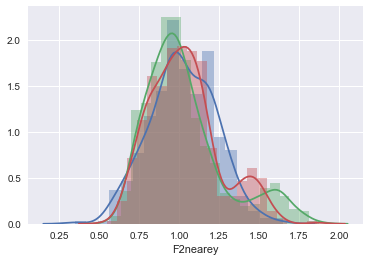

In [227]:
# Normalized French F2 compared to English F2 for Monolinguals AND Paris Residents
sns.distplot(french_vowels['F2nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels['F2nearey']) #new plot showing more detail of F1 normalized distribution
sns.distplot(english_vowels_C['F2nearey']) #new plot showing more detail of F1 normalized distribution

In [228]:
#Averages
#Average value for each vowel by going into the data of french_vowels or english_vowels via indexing
#Criteria based on string in column "PhonemeOrig" i.e. gather up all of the F1 values for all "i" rows in french_vowels, etc.
#Average those values to get average F1 and F2 value for each utterance

#Time for model to explore if Paris Residents match up into averages of English of French: Are they expats or not?
#Model is sklearn logit with cross validation initially, then try KNN

# Extract individual vowel sets and average normalized values

In [229]:
french_vowels_i = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='i')]
french_vowels_y = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='y')]
french_vowels_u = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='u')]
french_vowels_o1 = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='o1')]
french_vowels_eh = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='eh')]
french_vowels_a = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='a')]
french_vowels_oe = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='oe')]
french_vowels_e = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='e')]
french_vowels_o = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='o')]
french_vowels_oh = data[(data['Language']=='French') & (data['Group']=='D') & (data['Phoneme']=='oh')]

In [230]:
english_vowels_ij = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='ij')]
english_vowels_uw = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='uw')]
english_vowels_3h = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='3h')]
english_vowels_ae = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='ae')]
english_vowels_ih = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='ih')]
english_vowels_oU = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='oU')]
english_vowels_oo = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='oo')]
english_vowels_ah = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='ah')]
english_vowels_uh = data[(data['Language']=='English') & (data['Group']=='A') & (data['Phoneme']=='uh')]

In [231]:
frf1_i = french_vowels_i['F1nearey'].mean()
frf1_y = french_vowels_y['F1nearey'].mean()
frf1_u = french_vowels_u['F1nearey'].mean()
frf1_o1 = french_vowels_o1['F1nearey'].mean()
frf1_eh = french_vowels_eh['F1nearey'].mean()
frf1_a = french_vowels_a['F1nearey'].mean()
frf1_oe = french_vowels_oe['F1nearey'].mean()
frf1_e = french_vowels_e['F1nearey'].mean()
frf1_o = french_vowels_o['F1nearey'].mean()
frf1_oh = french_vowels_oh['F1nearey'].mean()

frf2_i = french_vowels_i['F2nearey'].mean()
frf2_y = french_vowels_y['F2nearey'].mean()
frf2_u = french_vowels_u['F2nearey'].mean()
frf2_o1 = french_vowels_o1['F2nearey'].mean()
frf2_eh = french_vowels_eh['F2nearey'].mean()
frf2_a = french_vowels_a['F2nearey'].mean()
frf2_oe = french_vowels_oe['F2nearey'].mean()
frf2_e = french_vowels_e['F2nearey'].mean()
frf2_o = french_vowels_o['F2nearey'].mean()
frf2_oh = french_vowels_oh['F2nearey'].mean()

In [232]:
print frf1_i
print frf1_y
print frf1_u
print frf1_o1
print frf1_eh
print frf1_a
print frf1_oe
print frf1_e
print frf1_o
print frf1_oh

print frf2_i
print frf2_y
print frf2_u
print frf2_o1
print frf2_eh
print frf2_a
print frf2_oe
print frf2_e
print frf2_o
print frf2_oh

0.760536585366
0.756179487179
0.773289473684
0.991476190476
1.1634047619
1.46382222222
1.17938095238
0.952512195122
1.00138461538
1.14978571429
1.33414634146
1.1151025641
0.745473684211
0.970880952381
1.18673809524
1.0138
0.991476190476
1.19963414634
0.762794871795
0.872523809524


In [233]:
enf1_ij = english_vowels_ij['F1nearey'].mean()
enf1_uw = english_vowels_uw['F1nearey'].mean()
enf1_3h = english_vowels_3h['F1nearey'].mean()
enf1_ae = english_vowels_ae['F1nearey'].mean()
enf1_ih = english_vowels_ih['F1nearey'].mean()
enf1_oU = english_vowels_oU['F1nearey'].mean()
enf1_oo = english_vowels_oo['F1nearey'].mean()
enf1_ah = english_vowels_ah['F1nearey'].mean()
enf1_uh = english_vowels_uh['F1nearey'].mean()

enf2_ij = english_vowels_ij['F2nearey'].mean()
enf2_uw = english_vowels_uw['F2nearey'].mean()
enf2_3h = english_vowels_3h['F2nearey'].mean()
enf2_ae = english_vowels_ae['F2nearey'].mean()
enf2_ih = english_vowels_ih['F2nearey'].mean()
enf2_oU = english_vowels_oU['F2nearey'].mean()
enf2_oo = english_vowels_oo['F2nearey'].mean()
enf2_ah = english_vowels_ah['F2nearey'].mean()
enf2_uh = english_vowels_uh['F2nearey'].mean()

In [234]:
print enf1_ij
print enf1_uw
print enf1_3h
print enf1_ae
print enf1_ih
print enf1_oU
print enf1_oo
print enf1_ah
print enf1_uh

print enf2_ij
print enf2_uw
print enf2_3h
print enf2_ae
print enf2_ih
print enf2_oU
print enf2_oo
print enf2_ah
print enf2_uh

0.746523076923
0.763257575758
1.33174242424
1.80086764706
1.0543880597
1.07008928571
1.11464179104
1.55335820896
1.34562686567
1.5938
1.11236363636
1.05972727273
0.949426470588
1.17020895522
0.863285714286
0.870701492537
0.757268656716
0.914671641791


# Conclusions

The data are unclear in these visual representations. It seems that these Paris Residents are producing distrubtions on F1 and F2 normalized values that are similar to American English monolinguals (see Green and Red distributions) while the French monolinguals (blue distribution) have productions that when compared to either the Paris Residents or the American monolinguals, demonstrate that there is still a difference between languages, regardless of experience in the L2 environment. 

# Final Project - Modeling

In [246]:
# Dummy Variables, PR = Paris Resident
# data['PR'] = df['Group'].map({'C': 1, 'A': 0, 'B': 0, 'D': 0})
data = data.join(pd.get_dummies(df['Group']))
data

ValueError: columns overlap but no suffix specified: Index([u'A', u'B', u'C', u'D'], dtype='object')

In [ ]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
logit_res.summary()

# Logit Function

In [247]:
data['intercept'] = 1.0
data

,Subject,Group,Language,Word,PhonemeOrig,Phoneme,F1,F2,F1nearey,F2nearey,A,B,C,D,intercept
0,AL,C,English,bets,eh,3h,508.9,1740.6,1.155,1.118,0,0,1,0,1.0
1,AL,C,English,debts,eh,3h,552.7,1810.8,1.254,1.163,0,0,1,0,1.0
2,AL,C,English,jets,eh,3h,495.7,1656.9,1.125,1.064,0,0,1,0,1.0
3,AL,C,English,peck,eh,3h,538.1,1685.1,1.221,1.082,0,0,1,0,1.0
4,AL,C,English,said,eh,3h,465.5,1677.5,1.056,1.077,0,0,1,0,1.0
5,AL,C,English,shed,eh,3h,498.6,1657.3,1.132,1.064,0,0,1,0,1.0
6,AM,C,English,bets,eh,3h,568.1,1967.1,1.201,1.150,0,0,1,0,1.0
7,AM,C,English,debts,eh,3h,574.5,1965.0,1.215,1.149,0,0,1,0,1.0
8,AM,C,English,jets,eh,3h,510.5,1944.4,1.079,1.137,0,0,1,0,1.0
9,AM,C,English,peck,eh,3h,650.2,1775.4,1.375,1.038,0,0,1,0,1.0


In [237]:
train_cols = data.columns[1:]
train_cols

Index([       u'Group',     u'Language',         u'Word', u'PhonemeOrig ',
            u'Phoneme',           u'F1',           u'F2',     u'F1nearey',
           u'F2nearey',            u'A',            u'B',            u'C',
                  u'D',    u'intercept'],
      dtype='object')

In [238]:
logit = sm.Logit(data['F1nearey'], df[train_cols])
result = logit.fit()

KeyError: "Index([u'A', u'B', u'C', u'D', u'intercept'], dtype='object') not in index"

In [ ]:
print result.summary()

In [ ]:
print np.exp(result.params)

In [ ]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

# Logistic Regression and Cross Validation